<p><font size="6"><b>Scientific Python essentials</b></font></p>

> *Introduction to GIS scripting*  
> *May, 2017*

> *© 2017, Stijn Van Hoey (<mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*


## Introduction

There is a large variety of packages available in Python to support research. Importing a package is like getting a piece of lab equipment out of a storage locker and setting it up on the bench for use in a project. Once a library is set up (imported), it can be used or called to perform many tasks.

In this notebook, we will focus on two fundamental packages within most scientific applications:

1. Numpy
1. Pandas

Furthermore, if plotting is required, this will be done with matplotlib package (we only use `plot` and `imshow` in this tutorial):

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

## Numpy

### Introduction

NumPy is the fundamental package for **scientific computing** with Python.

Information for the *freaks*:
    
* a powerful N-dimensional array/vector/matrix object
* sophisticated (broadcasting) functions
* function implementation in C/Fortran assuring good performance if vectorized
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

*In short*: Numpy is the Python package to do **fast** calculations!

It is a community agreement to import the numpy package with the prefix `np` to identify the usage of numpy functions. Use the `CTRL` + `SHIFT` option to check the available functions of numpy:

In [2]:
import numpy as np

In [3]:
# np. # explore the namespace

Numpy provides many mathematical functions, which operate element-wise on a so-called **`numpy.ndarray`** data type (in short: `array`).

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> There is a lot of functionality in Numpy. Knowing **how to find a specific function** is more important than knowing all functions...
    </ul>
</div>

You were looking for some function to derive quantiles of an array...

In [4]:
np.lookfor("quantile")

Search results for 'quantile'
-----------------------------
numpy.percentile
    Compute the qth percentile of the data along the specified axis.
numpy.nanpercentile
    Compute the qth percentile of the data along the specified axis,


Different methods do read the manual:

In [5]:
#?np.percentile

In [6]:
# help(np.percentile) 

In [7]:
# use SHIFT + TAB

### Showcases

* You like to play boardgames, but you want to better know you're chances of rolling a certain combination (sum) with 2 dices:

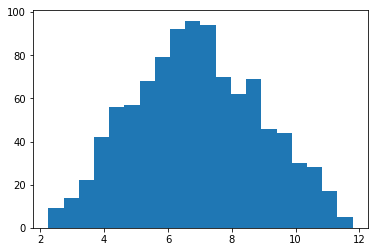

In [8]:
throws = 1000 # number of rolls with the dices

stone1 = np.random.uniform(1, 6, throws) # outcome of throws with dice 1
stone2 = np.random.uniform(1, 6, throws) # outcome of throws with dice 2
total = stone1 + stone2  # sum of each outcome
histogram = plt.hist(total, bins=20) # plot as histogram

* Consider a random 10x2 matrix representing cartesian coordinates (between 0 and 1), how to convert them to polar coordinates?

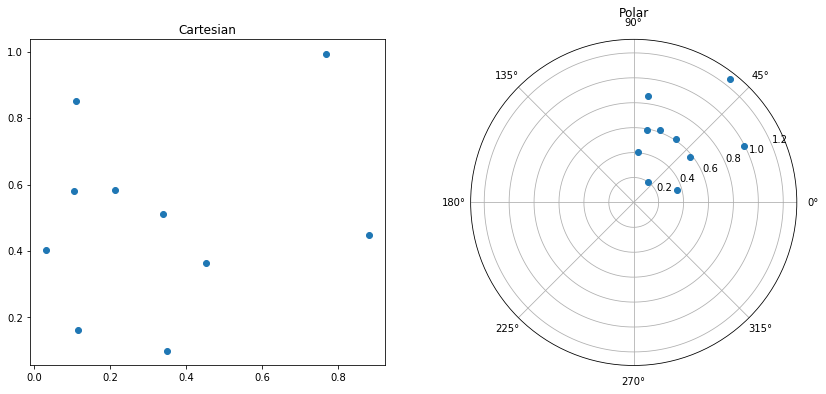

In [9]:
# random numbers (X, Y in 2 columns)
Z = np.random.random((10,2))
X, Y = Z[:,0], Z[:,1]

# Distance 
R = np.sqrt(X**2 + Y**2)
# Angle
T = np.arctan2(Y, X) # Array of angles in radians
Tdegree = T*180/(np.pi) # If you like degrees more

# NEXT PART (purely for illustration)
# plot the cartesian coordinates
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax1.plot(Z[:,0], Z[:,1], 'o')
ax1.set_title("Cartesian")
#plot the polar coorsidnates
ax2 = plt.subplot(122, polar=True)
ax2.plot(T, R, 'o')
ax2.set_title("Polar")

* Rescale the values of a given array to values in the range [0-1] and mark zero values are Nan:

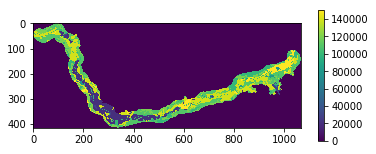

In [10]:
nete_bodem = np.load("../data/nete_bodem.npy")
plt.imshow(nete_bodem)
plt.colorbar(shrink=0.6)

In [11]:
nete_bodem_rescaled = (nete_bodem - nete_bodem.min())/(nete_bodem.max() - nete_bodem.min()) # rescale
nete_bodem_rescaled[nete_bodem_rescaled == 0.0] = np.nan  # assign Nan values to zero values

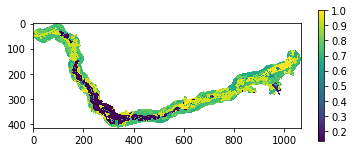

In [12]:
plt.imshow(nete_bodem_rescaled)
plt.colorbar(shrink=0.6)

(**Remark:** There is no GIS-component in the previous manipulation, these are pure element-wise operations on an array!)

### Creating numpy array

In [13]:
np.array([1, 1.5, 2, 2.5])  #np.array(anylist)

array([ 1. ,  1.5,  2. ,  2.5])

<div class="alert alert-warning">
    <b>R comparison:</b><br>
    <p>One could compare the numpy array to the R vector. It contains a single data type (character, float, integer) and operations are element-wise.</p>
</div>

Provide a range of values, with a begin, end and stepsize:

In [14]:
np.arange(5, 12, 2)

array([ 5,  7,  9, 11])

Provide a range of values, with a begin, end and number of values in between:

In [15]:
np.linspace(2, 13, 3)

array([  2. ,   7.5,  13. ])

Create empty arrays or arrays filled with ones:

In [16]:
np.zeros((5, 2)), np.ones(5)

(array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]), array([ 1.,  1.,  1.,  1.,  1.]))

Request the `shape` or the `size` of the arrays:

In [17]:
np.zeros((5, 2)).shape, np.zeros((5, 2)).size

((5, 2), 10)

And creating random numbers:

In [18]:
np.random.rand(5,5)  # check with np.random. + TAB for sampling from other distributions!

array([[ 0.38438942,  0.97434155,  0.38502669,  0.15532264,  0.823198  ],
       [ 0.78587399,  0.27499523,  0.70757633,  0.47966322,  0.55844034],
       [ 0.4711012 ,  0.85971443,  0.92337492,  0.7120357 ,  0.58327473],
       [ 0.99297042,  0.29729801,  0.14433942,  0.97605846,  0.23636861],
       [ 0.05894808,  0.68050613,  0.70513088,  0.30843527,  0.06710415]])

Reading in from binary file:

In [19]:
nete_bodem = np.load("../data/nete_bodem.npy")

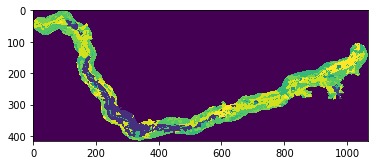

In [20]:
plt.imshow(nete_bodem)

Reading in from a **text**-file:

In [21]:
nete_bodem_subset = np.loadtxt("../data/nete_bodem_subset.out")

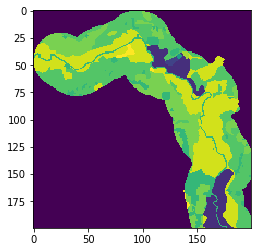

In [22]:
plt.imshow(nete_bodem_subset)

### Slicing (accessing values in arrays)

This i equivalent to the slicing of a `list`:

In [23]:
my_array = np.random.randint(2, 10, 10)
my_array

array([7, 2, 7, 2, 5, 4, 5, 6, 4, 2])

In [24]:
my_array[:5], my_array[4:], my_array[-2:]

(array([7, 2, 7, 2, 5]), array([5, 4, 5, 6, 4, 2]), array([4, 2]))

In [25]:
my_array[0:7:2]

array([7, 7, 5, 5])

In [26]:
sequence = np.arange(0, 11, 1)
sequence, sequence[::2], sequence[1::3], 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  2,  4,  6,  8, 10]),
 array([ 1,  4,  7, 10]))

Assign new values to items

In [27]:
my_array[:2] = 10
my_array

array([10, 10,  7,  2,  5,  4,  5,  6,  4,  2])

In [28]:
my_array = my_array.reshape(5, 2)
my_array

array([[10, 10],
       [ 7,  2],
       [ 5,  4],
       [ 5,  6],
       [ 4,  2]])

With multiple dimensions, we get the option of slice amongst these dimensions:

In [29]:
my_array[0, :]

array([10, 10])

### Aggregation calculations

In [30]:
my_array = np.random.randint(2, 10, 10)
my_array

array([2, 8, 9, 6, 4, 8, 4, 8, 7, 3])

In [31]:
print('Mean value is', np.mean(my_array))
print('Median value is',  np.median(my_array))
print('Std is', np.std(my_array))
print('Variance is', np.var(my_array))
print('Min is', my_array.min())
print('Element of minimum value is', my_array.argmin())
print('Max is', my_array.max())
print('Sum is', np.sum(my_array))
print('Prod', np.prod(my_array))
print('Unique values in this array are:', np.unique(my_array))
print('85% Percentile value is: ', np.percentile(my_array, 85))

Mean value is 5.9
Median value is 6.5
Std is 2.34307490277
Variance is 5.49
Min is 2
Element of minimum value is 0
Max is 9
Sum is 59
Prod 18579456
Unique values in this array are: [2 3 4 6 7 8 9]
85% Percentile value is:  8.0


In [32]:
my_other_array = np.random.randint(2, 10, 10).reshape(2, 5)
my_other_array

array([[4, 6, 4, 8, 2],
       [2, 3, 4, 7, 4]])

use the argument `axis` to define the ax to calculate a specific statistic:

In [33]:
my_other_array.max(), my_other_array.max(axis=1), my_other_array.max(axis=0)

(8, array([8, 7]), array([4, 6, 4, 8, 4]))

### Element-wise operations

In [8]:
my_array = np.random.randint(2, 10, 10)

In [9]:
my_array

array([7, 9, 3, 9, 5, 3, 3, 2, 3, 5])

In [10]:
print('Cumsum is', np.cumsum(my_array))
print('CumProd is', np.cumprod(my_array))
print('CumProd of 5 first elements is', np.cumprod(my_array)[4])

Cumsum is [ 7 16 19 28 33 36 39 41 44 49]
CumProd is [      7      63     189    1701    8505   25515   76545  153090  459270
 2296350]
CumProd of 5 first elements is 8505


In [11]:
np.exp(my_array), np.sin(my_array)

(array([  1.09663316e+03,   8.10308393e+03,   2.00855369e+01,
          8.10308393e+03,   1.48413159e+02,   2.00855369e+01,
          2.00855369e+01,   7.38905610e+00,   2.00855369e+01,
          1.48413159e+02]),
 array([ 0.6569866 ,  0.41211849,  0.14112001,  0.41211849, -0.95892427,
         0.14112001,  0.14112001,  0.90929743,  0.14112001, -0.95892427]))

In [12]:
my_array%3  # == 0

array([1, 0, 0, 0, 2, 0, 0, 2, 0, 2])

Using the numpy available function from the library or using the object method?

In [13]:
np.cumsum(my_array) == my_array.cumsum()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [49]:
my_array.dtype

dtype('int64')

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Check the documentation of both `np.cumsum()` and `my_array.cumsum()`. What is the difference?</li>
    <li>Why do we use brackets () to run `cumsum` and we do not use brackets when asking for the `dtype`?</li>
</ul>
</div>

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> `np.cumsum` operates a <b>method/function</b> from the numpy library with input an array, e.g. `my_array`
        <li> `my_array.cumsum()` is a <b>method/function</b> available to the object `my_array`
        <li> `dtype` is an attribute/characteristic of the object `my_array`
    </ul>
</div>

<div class="alert alert-danger">
<ul>
    <li>It is all about calling a **method/function()** on an **object** to perform an action. The available methods are provided by the packages (or any function you write and import).
    <li>Objects also have **attributes**, defining the characteristics of the object (these are not actions)
</ul>
     
</div>

In [17]:
my_array.cumsum()

array([ 7, 16, 19, 28, 33, 36, 39, 41, 44, 49])

In [18]:
my_array.max(axis=0)

9

In [19]:
my_array * my_array  # element-wise

array([49, 81,  9, 81, 25,  9,  9,  4,  9, 25])

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> The operations do work on all elements of the array at the same time, you don't need a <strike>`for` loop<strike>
    </ul>
</div>

What is the added value of the numpy implementation compared to 'basic' python?

In [20]:
a_list = range(1000)
%timeit [i**2 for i in a_list]

361 µs ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
an_array = np.arange(1000)
%timeit an_array**2

1.38 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Boolean indexing and filtering (!)

This is a fancy term for making selections based on a **condition**!

Let's start with an array that contains random values:

In [45]:
row_array = np.random.randint(1, 20, 10)
row_array

array([ 5,  7,  8, 15, 11, 16,  9,  3,  5, 10])

Conditions can be checked (*element-wise*):

In [46]:
row_array > 5

array([False,  True,  True,  True,  True,  True,  True, False, False,  True], dtype=bool)

In [47]:
boolean_mask = row_array > 5
boolean_mask

array([False,  True,  True,  True,  True,  True,  True, False, False,  True], dtype=bool)

You can use this as a filter to select elements of an array:

In [48]:
row_array[boolean_mask]

array([ 7,  8, 15, 11, 16,  9, 10])

or, also to change the values in the array corresponding to these conditions:

In [49]:
row_array[boolean_mask] = 20
row_array

array([ 5, 20, 20, 20, 20, 20, 20,  3,  5, 20])

in short - making the values equal to 20 now -20:

In [50]:
row_array[row_array == 20] = -20
row_array

array([  5, -20, -20, -20, -20, -20, -20,   3,   5, -20])

<div class="alert alert-warning">
    <b>R comparison:</b><br>
    <p>This is similar to conditional filtering in R on vectors...</p>
</div>

<div class="alert alert-danger">
    Understanding conditional selections and assignments is CRUCIAL!
</div>

This requires some practice...

In [51]:
AR = np.random.randint(0, 20, 15)
AR

array([ 5,  3, 12, 14, 11,  0,  8, 10, 16,  1, 13,  8,  8,  7, 16])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Count the number of values in AR that are larger than 10 (note: you can count with True = 1 and False = 0)</li>
</ul>
</div>

In [52]:
sum(AR > 10)

6

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Change all even numbers of `AR` into zero-values.</li>
</ul>
</div>

In [53]:
AR[AR%2 == 0] = 0
AR

array([ 5,  3,  0,  0, 11,  0,  0,  0,  0,  1, 13,  0,  0,  7,  0])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Change all even positions of matrix AR into 30 values</li>
</ul>
</div>

In [54]:
AR[1::2] = 30
AR

array([ 5, 30,  0, 30, 11, 30,  0, 30,  0, 30, 13, 30,  0, 30,  0])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Select all values above the 75th `percentile` of the following array AR2 ad take the square root of these values</li>
</ul>
</div>

In [55]:
AR2 = np.random.random(10)
AR2

array([ 0.2170166 ,  0.32711233,  0.1024719 ,  0.46837866,  0.73870644,
        0.23983147,  0.84006343,  0.27242343,  0.29360816,  0.32338526])

In [56]:
np.sqrt(AR2[AR2 > np.percentile(AR2, 75)])

array([ 0.68438196,  0.85948033,  0.91654974])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Convert all values -99. of the array AR3 into Nan-values (Note that Nan values can be provided in float arrays as `np.nan`)</li>
</ul>
</div>

In [57]:
AR3 = np.array([-99., 2., 3., 6., 8, -99., 7., 5., 6., -99.])

In [58]:
AR3[AR3 == -99.] = np.nan
AR3

array([ nan,   2.,   3.,   6.,   8.,  nan,   7.,   5.,   6.,  nan])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Get an overview of the unique values present in the array `nete_bodem_subset`</li>
</ul>
</div>

In [59]:
nete_bodem_subset = np.loadtxt("../data/nete_bodem_subset.out")

In [60]:
np.unique(nete_bodem_subset)

array([      0.,   20000.,   30000.,   80000.,  100000.,  110000.,
        120000.,  130000.,  140000.,  150000.])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Reclassify the values of the array `nete_bodem_subset` (binary filter):</li>
        <ul>
            <li>values lower than or equal to 100000 should be 0</li>
            <li>values higher than 100000 should be 1</li>
        </ul>
</ul>
</div>

In [61]:
nete_bodem_subset = np.loadtxt("../data/nete_bodem_subset.out")

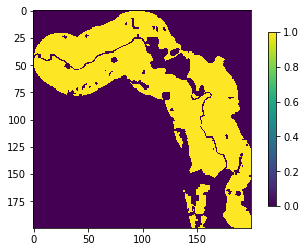

In [62]:
nete_bodem_subset[nete_bodem_subset <= 100000.] = 0
nete_bodem_subset[nete_bodem_subset > 100000.] = 1

plt.imshow(nete_bodem_subset)
plt.colorbar(shrink=0.8)

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> No need to retain everything, but have the reflex to search in the documentation (online docs, SHIFT-TAB, help(), lookfor())!!
        <li> Conditional selections (boolean indexing) is crucial!
    </ul>
</div>

This is just touching the surface of Numpy in order to proceed to the next phase (Pandas and GeoPandas)... 

More extended material on Numpy is available online:

* http://www.scipy-lectures.org/intro/numpy/index.html (great resource to start with scientifi python!)
* https://github.com/stijnvanhoey/course_python_introduction/blob/master/scientific/numpy.ipynb (more extended version of the material covered in this tutorial)

## Pandas: data analysis in Python

### Introduction

For data-intensive work in Python, the Pandas library has become essential. Pandas originally meant **Pan**el **Da**ta, though many users probably don't know that.

What is pandas?

* Pandas can be thought of as **NumPy arrays with labels for rows and columns**, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as **R's data.frame** in Python.
* Powerful for working with missing data, working with **time series** data, for reading and writing your data, for reshaping, grouping, merging your data,...

Pandas documentation is available on: http://pandas.pydata.org/pandas-docs/stable/

In [22]:
# community agreement: import as pd
import pandas as pd

### Data exploration

Reading in data to DataFrame

In [202]:
surveys_df = pd.read_csv("../data/surveys.csv")

In [203]:
surveys_df.head()  # Try also tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [204]:
surveys_df.shape

(35549, 9)

In [205]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [206]:
surveys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
record_id          35549 non-null int64
month              35549 non-null int64
day                35549 non-null int64
year               35549 non-null int64
plot_id            35549 non-null int64
species_id         34786 non-null object
sex                33038 non-null object
hindfoot_length    31438 non-null float64
weight             32283 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


In [207]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [209]:
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


<div class="alert alert-warning">
    <b>R comparison:</b><br>
    <p>See the similarities and differences with the R `data.frame` - e.g. you would use `summary(df)` instead of `df.describe()` :-)</p>
</div>

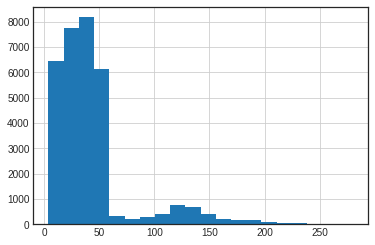

In [210]:
surveys_df["weight"].hist(bins=20)

### Series and DataFrames

A Pandas **Series** is a basic holder for one-dimensional labeled data. It can be created much as a NumPy array is created:

In [175]:
a_series = pd.Series([0.1, 0.2, 0.3, 0.4])
a_series

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

In [176]:
a_series.index, a_series.values

(RangeIndex(start=0, stop=4, step=1), array([ 0.1,  0.2,  0.3,  0.4]))

Series do have an index and values (*a numpy array*!) and you can give the series a name (amongst other things)

In [177]:
a_series.name = "example_series"

In [178]:
a_series

0    0.1
1    0.2
2    0.3
3    0.4
Name: example_series, dtype: float64

In [179]:
a_series[2]

0.29999999999999999

Unlike the NumPy array, though, this index can be something other than integers:

In [180]:
a_series2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
a_series2['c']

2

A DataFrame is a tabular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.
<img src="../img/schema-dataframe.svg" width=50%><br>
Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [181]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [184]:
surveys_df["species_id"].head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object

If you selecte a single column of a DataFrame, you end up with... a Series:

In [186]:
type(surveys_df), type(surveys_df["species_id"])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Aggregation and element-wise calculations

Completely similar to Numpy, aggregation statistics are available:

In [224]:
print('Mean weight is', surveys_df["weight"].mean())
print('Median weight is',  surveys_df["weight"].median())
print('Std of weight is', surveys_df["weight"].std())
print('Variance of weight is', surveys_df["weight"].var())
print('Min is', surveys_df["weight"].min())
print('Element of minimum value is', surveys_df["weight"].argmin())
print('Max is', surveys_df["weight"].max())
print('Sum is', surveys_df["weight"].sum())
print('85% Percentile value is: ', surveys_df["weight"].quantile(0.85))

Mean weight is 42.672428213
Median weight is 37.0
Std of weight is 36.6312594746
Variance of weight is 1341.84917069
Min is 4.0
Element of minimum value is 217
Max is 280.0
Sum is 1377594.0
85% Percentile value is:  53.0


Calculations are **element-wise**, e.g. adding the normalized weight (relative to its mean) as an additional column:

In [225]:
surveys_df['weight_normalised'] = surveys_df["weight"]/surveys_df["weight"].mean()

Pandas and Numpy collaborate well (Numpy methods can be applied on the DataFrame values, as these are actually numpy arrays):

In [257]:
np.sqrt(surveys_df["hindfoot_length"]).head()

0    5.656854
1    5.744563
2    6.082763
3    6.000000
4    5.916080
Name: hindfoot_length, dtype: float64

**Groupby** provides the functionality to do an aggregation or calculation for each group:

In [259]:
surveys_df.groupby('sex')[['hindfoot_length', 'weight']].mean() # Try yourself with min, max,...

,hindfoot_length,weight
sex,,
F,28.836780,42.170555
M,29.709578,42.995379


<div class="alert alert-warning">
    <b>R comparison:</b><br>
    <p>Similar with groupby in R, i.e. working with factors</p>
</div>

### Slicing

<div class="alert alert-info">
    <b>ATTENTION!:</b><br><br>
    One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br>We now have to distuinguish between:
    <ul>
        <li> selection by **label**: loc
        <li> selection by **position** iloc
    </ul>
</div>

In [308]:
# example dataframe from scratch
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


#### The shortcut []

In [283]:
countries['area'] # single []

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [284]:
countries[['area', 'population']] # double [[]]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3
Germany,357050,81.3
Netherlands,41526,16.9
United Kingdom,244820,64.9


In [285]:
countries['France':'Netherlands']

,area,capital,population
country,,,
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9


#### Systematic indexing with loc and iloc

When using [] like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:

* `loc`: selection by label
* `iloc`: selection by position

In [286]:
countries.loc['Germany', 'area']

357050

In [287]:
countries.loc['France':'Germany', ['area', 'population']]

,area,population
country,,
France,671308,64.3
Germany,357050,81.3


Selecting by position with iloc works **similar as indexing numpy arrays**:

In [288]:
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


### Boolean indexing

In short, similar to Numpy:

In [289]:
countries['area'] > 100000

country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: area, dtype: bool

Selecting by conditions:

In [305]:
countries[countries['area'] > 100000]

,area,capital,population,size
country,,,,
France,671308,Paris,64.3,LARGE
Germany,357050,Berlin,81.3,LARGE
United Kingdom,244820,London,64.9,LARGE


In [313]:
countries['size'] = np.nan # create an exmpty new column
countries

,area,capital,population,size
country,,,,
Belgium,30510,Brussels,11.3,NaN
France,671308,Paris,64.3,NaN
Germany,357050,Berlin,81.3,NaN
Netherlands,41526,Amsterdam,16.9,NaN
United Kingdom,244820,London,64.9,NaN


In [312]:
countries.loc[countries['area'] > 100000, "size"] = 'LARGE'
countries.loc[countries['area'] <= 100000, "size"] = 'SMALL'

In [304]:
countries

,area,capital,population,size
country,,,,
Belgium,30510,Brussels,11.3,SMALL
France,671308,Paris,64.3,LARGE
Germany,357050,Berlin,81.3,LARGE
Netherlands,41526,Amsterdam,16.9,SMALL
United Kingdom,244820,London,64.9,LARGE


### Combining DataFrames (!)

An important way to combine `DataFrames` is to use columns in each dataset that contain common values (a common unique id) as is done in databases. Combining `DataFrames` using a common field is called *joining*. Joining DataFrames in this way is often useful when one `DataFrames` is a “lookup table” containing additional data that we want to include in the other.

As an example, consider the availability of the species information in a separate lookup-table:

In [293]:
species_df = pd.read_csv("../data/species.csv", delimiter=";")

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Check the other `read_` functions that are available in the Pandas package yourself.
</ul>
</div>

In [294]:
species_df.head()

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent-not censused
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird


In [295]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_normalised
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


We see that both tables do have a common identifier column (`species_id`), which we ca use to join the two tables together with the command `merge`:

In [296]:
merged_left = pd.merge(surveys_df, species_df, how="left", on="species_id")

In [297]:
merged_left.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_normalised,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN,Dipodomys,merriami,Rodent


### Optional section: Pandas is great with time series

In [253]:
flowdata = pd.read_csv("../data/vmm_flowdata.csv", index_col=0, 
                       parse_dates=True)

In [254]:
flowdata.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> `pd.read_csv` provides a lot of built-in functionality to support this kind of transactions when reading in a file! Check the **help** of the read_csv function...
    </ul>
</div>


The index provides many attributes to work with:

In [123]:
flowdata.index.year, flowdata.index.dayofweek, flowdata.index.dayofyear #,...

(array([2009, 2009, 2009, ..., 2013, 2013, 2013], dtype=int32),
 array([3, 3, 3, ..., 1, 1, 2], dtype=int32),
 array([1, 1, 1, ..., 1, 1, 2], dtype=int32))

Subselecting periods can be done by the string representation of dates:

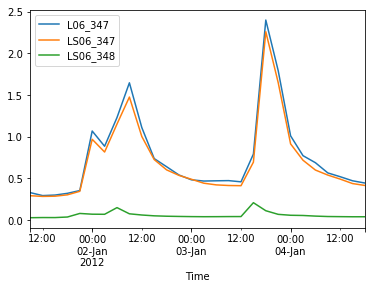

In [124]:
flowdata["2012-01-01 09:00":"2012-01-04 19:00"].plot()

or shorter when possible:

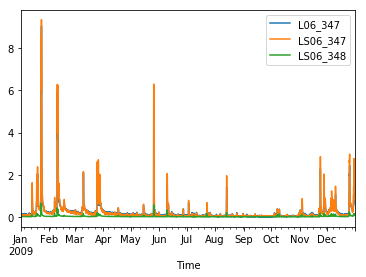

In [125]:
flowdata["2009"].plot()

Combinations with other selection criteria is possible, e.g. to get all months with 30 days in the year 2009:

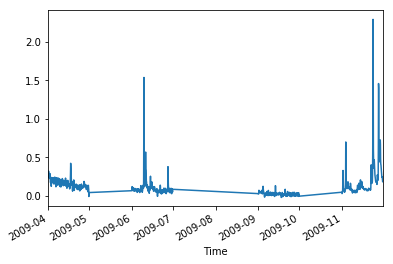

In [126]:
flowdata.loc[(flowdata.index.days_in_month == 30) & (flowdata.index.year == 2009), "L06_347"].plot()

Select all 'daytime' data (between 8h and 20h) for all days, station "L06_347":

In [127]:
flowdata[(flowdata.index.hour > 8) & (flowdata.index.hour < 20)].head()
# OR USE flowdata.between_time('08:00', '20:00')

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417


A **very powerful method** is `resample`: converting the frequency of the time series (e.g. from hourly to daily data).

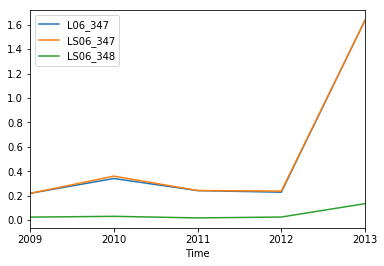

In [128]:
flowdata.resample('A').mean().plot()

A practical example is: Plot the monthly minimum and maximum of the daily average values of the `LS06_348` column

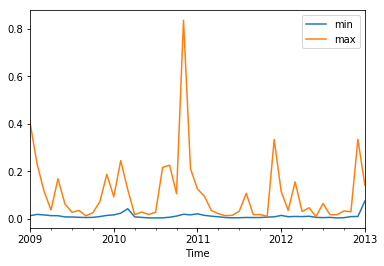

In [129]:
daily = flowdata['LS06_348'].resample('D').mean() # calculate the daily average value
daily.resample('M').agg(['min', 'max']).plot()  # calculate the monthly minimum and maximum values

Other plots are supported as well, e.g. a bar plot of the mean of the stations in year 2013

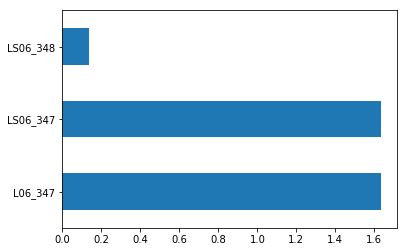

In [131]:
flowdata['2013'].mean().plot(kind='barh')

Acknowledgments and Material

* J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/
* http://scipy-lectures.github.io/intro/numpy/index.html
* http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html